In [2]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from keras import Input


In [4]:
entire_name_file = "entire_data.csv"
entire_data = pd.read_csv(entire_name_file)
# Hiển thị tất cả các dòng
# pd.set_option('display.max_rows', None)

# # Hiển thị tất cả các cột
# pd.set_option('display.max_columns', None)
# data_train = entire_data.iloc[:]
# data_test = entire_data.iloc[:]

# Tách các đặc trưng và nhãn
# filter: chi lay std cua truc y
df_filtered = entire_data.filter(['acceYstd'])
# X = entire_data.drop('label', axis=1)  # Các đặc trưng
X = df_filtered
y = entire_data['label']  # Nhãn
print(X)
print(y)


# print(y_test.head())

     acceYstd
0    0.207284
1    0.191777
2    0.153794
3    0.223098
4    0.197439
..        ...
265  0.154883
266  0.035792
267  0.029394
268  0.033553
269  0.075272

[270 rows x 1 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
265    1.0
266    1.0
267    1.0
268    1.0
269    1.0
Name: label, Length: 270, dtype: float64


1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

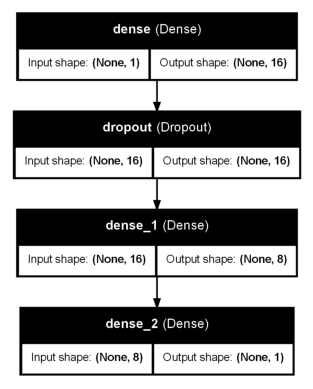

In [5]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# X_test = entire_data.drop('label', axis=1)  # Các đặc trưng
# y_test = entire_data['label']  # Nhãn
# Xác định input_dim
input_dim = X_train.shape[1]
print(input_dim)
# Khởi tạo mô hình Sequential
model = Sequential()
# Giảm số lượng neurons trong các lớp Dense
model.add(Input(shape=(input_dim,)))  # shape thay thế cho input_dim
model.add(Dense(16, activation='relu'))  # Giảm từ 32 xuống 16
model.add(Dropout(0.5)) # ngẫu nhiên "loại bỏ" (drop) 50% số lượng neurons tại một lớp cụ thể trong mỗi lần huấn luyện (training). Các neurons bị loại bỏ sẽ không tham gia vào quá trình tính toán forward và backward propagation.
model.add(Dense(8, activation='relu'))  # Giảm từ 16 xuống 8
model.add(Dense(1, activation='sigmoid'))  # Lớp đầu ra

# Biên dịch mô hình
'''
Optimizer 'adam' (Adaptive Moment Estimation) là một lựa chọn phổ biến vì nó kết hợp các ưu điểm của hai phương pháp SGD và RMSProp. Nó tự động điều chỉnh tốc độ học cho từng tham số, giúp mô hình hội tụ nhanh hơn mà không cần phải tinh chỉnh quá nhiều siêu tham số.
'''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Hiển thị thông tin mô hình
model.summary()
# Vẽ biểu đồ mô hình
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=1000,  # Số lượng epoch có thể thay đổi tùy theo yêu cầu
    batch_size=32,  # Kích thước batch có thể thay đổi tùy theo yêu cầu
    validation_data=(X_test, y_test),  # Dữ liệu kiểm tra để đánh giá mô hình
    verbose=1  # Hiển thị quá trình huấn luyện
)
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8932 - loss: 0.2430 - val_accuracy: 0.9444 - val_loss: 0.7606
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9418 - loss: 0.1855 - val_accuracy: 0.9444 - val_loss: 0.7596
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9264 - loss: 0.1997 - val_accuracy: 0.9444 - val_loss: 0.7596
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9366 - loss: 0.1729 - val_accuracy: 0.9444 - val_loss: 0.7625
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9106 - loss: 0.2300 - val_accuracy: 0.9444 - val_loss: 0.7663
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9135 - loss: 0.2540 - val_accuracy: 0.9444 - val_loss: 0.7601
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9469 - loss: 0.1699 - val_accuracy: 0.9444 - val_loss: 0.7573
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9405 - loss: 0.1867 - val_accuracy: 0.9444 - val_loss

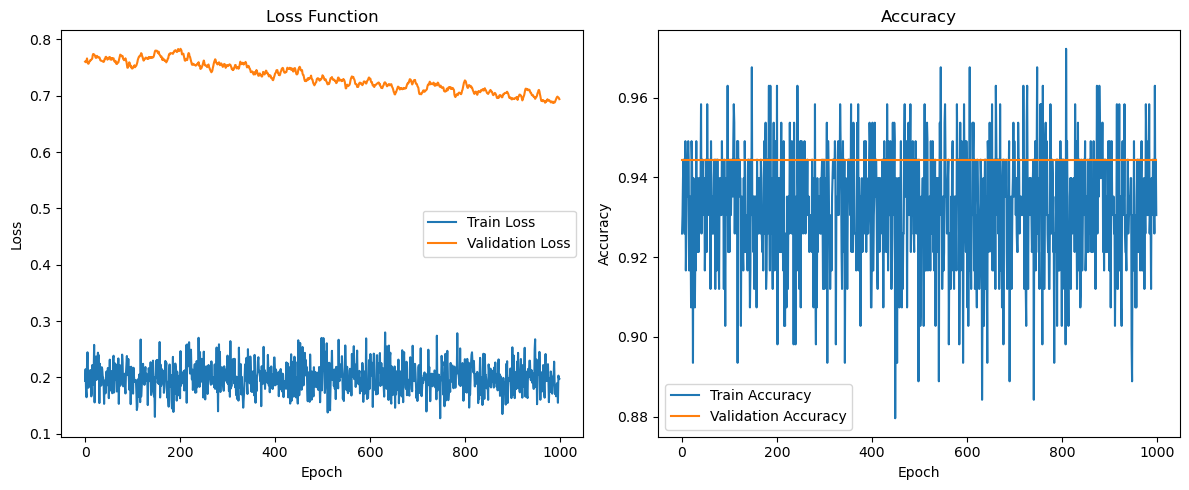

In [12]:
# Vẽ biểu đồ giá trị loss function trong quá trình huấn luyện
plt.figure(figsize=(12, 5))

# Biểu đồ hàm loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


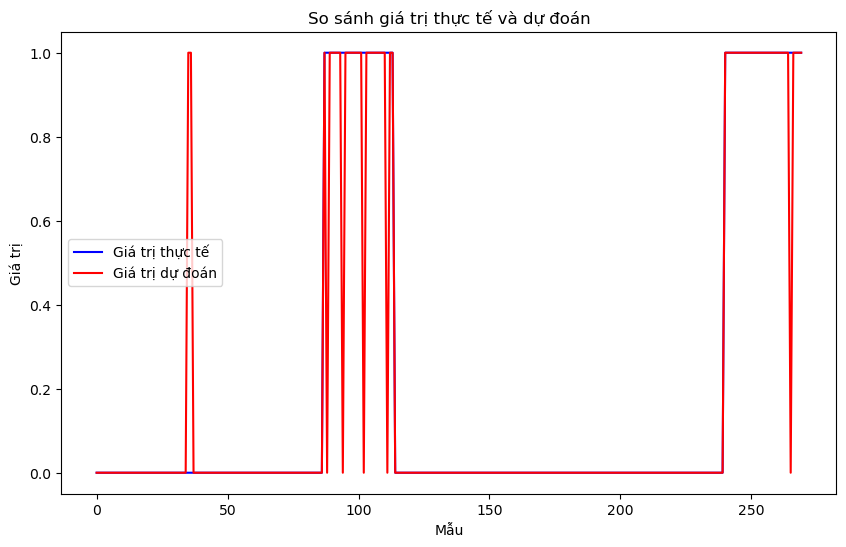

differences: 7 / 270


In [13]:
# Tách các đặc trưng và nhãn
X_data_test = entire_data.drop('label', axis=1)  # Các đặc trưng
X_data_test = entire_data.filter(['acceYstd'])
y_data_test = entire_data['label']  # Nhãn
# X_train, X_data_test, y_train, y_data_test = train_test_split(X, y, test_size=0.5, stratify=y)
# X_data_test = data_test.drop('label', axis=1)  # Các đặc trưng
# y_data_test = data_test['label']  # Nhãn
# Reset index cho X_data_test
X_data_test = X_data_test.reset_index(drop=True)

# Reset index cho y_data_test
y_data_test = y_data_test.reset_index(drop=True)
# Dự đoán dựa trên dữ liệu kiểm tra (X_test) hoặc dữ liệu mới (X_new)
predictions = model.predict(X_data_test)

# Hoặc nếu bạn có dữ liệu mới để dự đoán
# predictions = model.predict(X_new)

# In kết quả dự đoán
# print(predictions)
# Giả sử predictions là kết quả dự đoán và y_test là nhãn thực tế
# Chuyển đổi nếu cần thiết cho hồi quy (ví dụ: scale các giá trị)
predictions = predictions.flatten()  # Đảm bảo cùng định dạng với y_test nếu cần


# Giả sử predictions là kết quả dự đoán của mô hình
# Gán giá trị theo điều kiện <0.5 thành 0 và >=0.5 thành 1
predictions = np.where(predictions >= 0.5, 1, 0)
# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))

# Vẽ giá trị thực tế
plt.plot(y_data_test, label='Giá trị thực tế', color='blue')

# Vẽ giá trị dự đoán
plt.plot(predictions, label='Giá trị dự đoán', color='red')

# Thiết lập tiêu đề và nhãn
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá trị')

# Hiển thị chú thích (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()
count = 0
for i in range(len(predictions)):
    if y_data_test[i] != predictions[i]:
        count+=1
print(f"differences: {count} / {len(predictions)}")

In [7]:
# Lưu mô hình
model.save('my_model.h5')

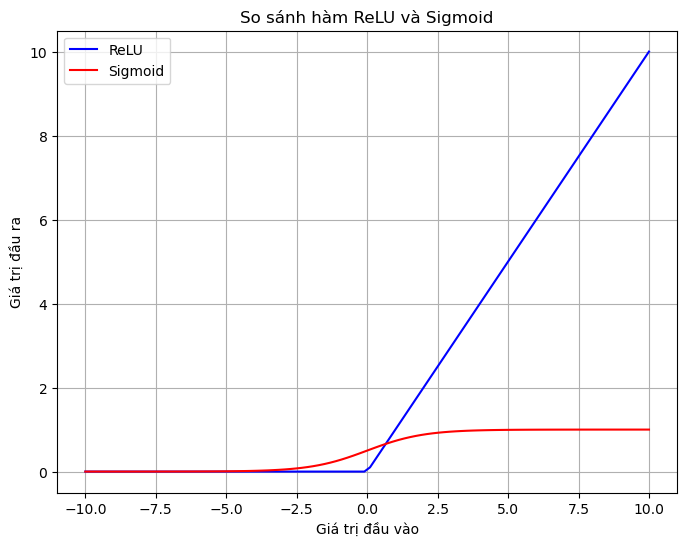

In [14]:
# Tạo dữ liệu x từ -10 đến 10
x = np.linspace(-10, 10, 100)

# Hàm relu và sigmoid
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
'''
Hàm kích hoạt relu (Rectified Linear Unit) thường được sử dụng trong
 các lớp ẩn của mạng nơ-ron vì nó giúp mô hình hội tụ nhanh hơn trong quá 
 trình huấn luyện. Khác với sigmoid, hàm relu giải quyết được vấn đề vanishing gradient
   khi số lượng lớp tăng lên. Với các bài toán phân loại nhị phân, hàm sigmoid thường chỉ được dùng ở lớp cuối cùng để tạo đầu ra xác suất từ 0 đến 1.
'''
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(x, relu, label='ReLU', color='b')
plt.plot(x, sigmoid, label='Sigmoid', color='r')
plt.title('So sánh hàm ReLU và Sigmoid')
plt.xlabel('Giá trị đầu vào')
plt.ylabel('Giá trị đầu ra')
plt.legend()
plt.grid(True)
plt.show()

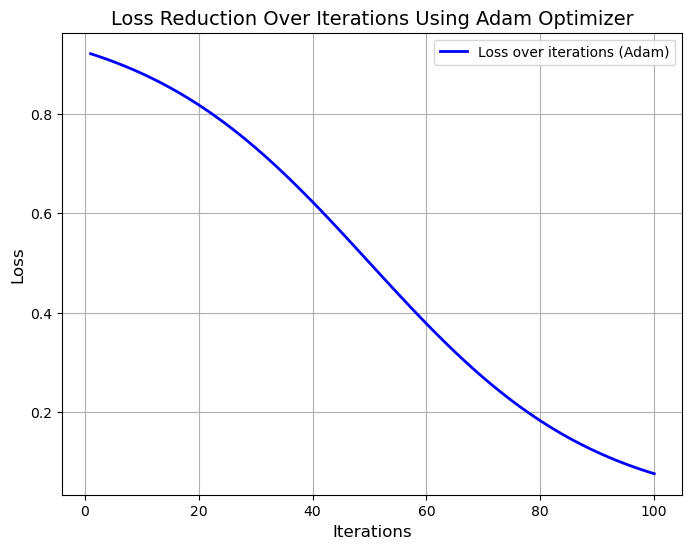

In [15]:
# Adam optimizer parameters
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-7

# Simulating loss values over iterations
iterations = np.arange(1, 101)
# Correcting the loss values to simulate decreasing loss over iterations
loss_values_decreasing = 1 / (1 + np.exp(0.05 * (iterations - 50)))  # Simulate loss decreasing over time

# Plotting the corrected loss over iterations
plt.figure(figsize=(8, 6))
plt.plot(iterations, loss_values_decreasing, label='Loss over iterations (Adam)', color='blue', linewidth=2)

# Adding labels and title
plt.title('Loss Reduction Over Iterations Using Adam Optimizer', fontsize=14)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()